In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame

%matplotlib inline

In [43]:
os.chdir("C:/Users/jthoma/OneDrive - Capgemini/Documents/IE Business School/Datathon/RadioLinkConcessionsSpain/new_data")

df = pd.read_csv("final_cleansed_standarized.csv", sep=';')
df

,Unnamed: 0,Referencia,Titular,NIF/CIF,Domicilio social,Localidad,Provincia_x,C. Postal,F. Concesion,F. Caducidad,...,Municipio,Frequencias,Tipo,codigopostalid,lat,lon,brand_sort,score_sort,match_sort,ratio
0,3,ALAL-0700001,"VODAFONE ONO, S.A.",A62186556,"AV AMERICA, 115",MADRID,MADRID,28042,2007-05-02,2022-12-31,...,CUEVAS DEL ALMANZORA,15.019,GHz,240.0,-2.712437e+09,4.293981e+10,VODAFONE ESPAÑA SA,100,"VODAFONE ESPAÑA, SA",73
1,254,ALAL-0900386,XFERA MOVILES SA,A82528548,"AVDA BRUSELAS, 38.",ALCOBENDAS,MADRID,28108,2010-01-02,2025-12-31,...,ALMERIA,18875.000,MHz,240.0,-2.712437e+09,4.293981e+10,XFERA MOVILES S.A.,94,"XFERA MOVILES, S.A.U.",86
2,438,ALAL-1000193,AXION INFRAESTRUCTURAS DE TELECOMUNICACIONES S...,A41999913,"AVDA ANDALUCÍA, S/N.",SEVILLA,SEVILLA,41907,NaN,2025-12-31,...,ALMERIA,14508.000,MHz,240.0,-2.712437e+09,4.293981e+10,REDES DE TELECOMUNICACION GALEGAS RETEGAL SA,100,"REDES DE TELECOMUNICACION GALEGAS RETEGAL, SA",62
3,645,ALAL-1000250,"VODAFONE ONO, S.A.",A62186556,"AV AMERICA, 115",MADRID,MADRID,28042,NaN,2025-12-31,...,ALMERIA,19.095,GHz,240.0,-2.712437e+09,4.293981e+10,VODAFONE ESPAÑA SA,100,"VODAFONE ESPAÑA, SA",73
4,1929,ALAL-1000334,"VODAFONE ONO, S.A.",A62186556,"AV AMERICA, 115",MADRID,MADRID,28042,2010-10-12,2025-12-31,...,CUEVAS DEL ALMANZORA,15.019,GHz,240.0,-2.712437e+09,4.293981e+10,VODAFONE ESPAÑA SA,100,"VODAFONE ESPAÑA, SA",73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,807531,MUMU-2200650,"ORANGE ESPAGNE, S.A.U",A82009812,"PASEO CLUB DEPORTIVO, 1.",POZUELO DE ALARCON,MADRID,28223,2022-05-07,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE ESPAGNE SA,100,"ORANGE ESPAGNE, SA",86
4950,807638,MUMU-2200651,"ORANGE ESPAGNE, S.A.U",A82009812,"PASEO CLUB DEPORTIVO, 1.",POZUELO DE ALARCON,MADRID,28223,2022-05-07,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE ESPAGNE SA,100,"ORANGE ESPAGNE, SA",86
4951,807745,MUMU-2200653,"ORANGE ESPAGNE, S.A.U",A82009812,"PASEO CLUB DEPORTIVO, 1.",POZUELO DE ALARCON,MADRID,28223,2022-06-07,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE ESPAGNE SA,100,"ORANGE ESPAGNE, SA",86
4952,807852,MUMU-2200655,"ORANGE ESPAGNE, S.A.U",A82009812,"PASEO CLUB DEPORTIVO, 1.",POZUELO DE ALARCON,MADRID,28223,2022-06-07,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE ESPAGNE SA,100,"ORANGE ESPAGNE, SA",86


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4954 non-null   int64  
 1   Referencia                  4954 non-null   object 
 2   Titular                     4954 non-null   object 
 3   NIF/CIF                     4954 non-null   object 
 4   Domicilio social            4954 non-null   object 
 5   Localidad                   4954 non-null   object 
 6   Provincia_x                 4954 non-null   object 
 7   C. Postal                   4954 non-null   int64  
 8   F. Concesion                1929 non-null   object 
 9   F. Caducidad                4953 non-null   object 
 10  Susceptible cesion          4954 non-null   bool   
 11  Susceptible mutualizacion   4954 non-null   bool   
 12  Obtenido por transferencia  4954 non-null   bool   
 13  dia_concesion               4954 

In [45]:
df.describe()

,Unnamed: 0,C. Postal,dia_concesion,mes_concesion,año_concesion,Frequencias,codigopostalid,lat,lon,score_sort,ratio
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,789.000000,789.000000,7.890000e+02,7.890000e+02,4954.000000,4954.000000
mean,395252.140291,25727.424102,1087.398264,90.603553,3.016149,17757.128426,395.368821,-2.747686e+09,4.295236e+10,98.857287,82.402705
std,231249.544422,7674.420394,1645.128614,137.081260,4.578294,24082.199604,402.105139,1.035561e+08,5.372662e+07,2.532730,10.800876
min,3.000000,2230.000000,0.000000,0.000000,0.000000,12.765000,240.000000,-3.127917e+09,4.252926e+10,80.000000,61.000000
25%,183666.500000,28042.000000,0.000000,0.000000,0.000000,22.106000,240.000000,-2.712437e+09,4.293981e+10,100.000000,75.000000
50%,398221.500000,28042.000000,0.000000,0.000000,0.000000,7694.000000,240.000000,-2.712437e+09,4.293981e+10,100.000000,86.000000
75%,584089.250000,28223.000000,2033.000000,169.000000,6.000000,22078.000000,240.000000,-2.712437e+09,4.293981e+10,100.000000,88.000000
max,807959.000000,50009.000000,12783.000000,1065.000000,36.000000,85750.000000,1474.000000,-2.316708e+09,4.312084e+10,100.000000,100.000000


In [46]:
df.isna().sum()

Unnamed: 0                       0
Referencia                       0
Titular                          0
NIF/CIF                          0
Domicilio social                 0
Localidad                        0
Provincia_x                      0
C. Postal                        0
F. Concesion                  3025
F. Caducidad                     1
Susceptible cesion               0
Susceptible mutualizacion        0
Obtenido por transferencia       0
dia_concesion                    0
mes_concesion                    0
año_concesion                    0
Comunidad                     4165
Provincia_y                   4165
Municipio                     4165
Frequencias                   4165
Tipo                          4165
codigopostalid                4165
lat                           4165
lon                           4165
brand_sort                       0
score_sort                       0
match_sort                       0
ratio                            0
dtype: int64

In [47]:
df.isnull().sum()

Unnamed: 0                       0
Referencia                       0
Titular                          0
NIF/CIF                          0
Domicilio social                 0
Localidad                        0
Provincia_x                      0
C. Postal                        0
F. Concesion                  3025
F. Caducidad                     1
Susceptible cesion               0
Susceptible mutualizacion        0
Obtenido por transferencia       0
dia_concesion                    0
mes_concesion                    0
año_concesion                    0
Comunidad                     4165
Provincia_y                   4165
Municipio                     4165
Frequencias                   4165
Tipo                          4165
codigopostalid                4165
lat                           4165
lon                           4165
brand_sort                       0
score_sort                       0
match_sort                       0
ratio                            0
dtype: int64

In [48]:
df.columns

Index(['Unnamed: 0', 'Referencia', 'Titular', 'NIF/CIF', 'Domicilio social',
       'Localidad', 'Provincia_x', 'C. Postal', 'F. Concesion', 'F. Caducidad',
       'Susceptible cesion', 'Susceptible mutualizacion',
       'Obtenido por transferencia', 'dia_concesion', 'mes_concesion',
       'año_concesion', 'Comunidad', 'Provincia_y', 'Municipio', 'Frequencias',
       'Tipo', 'codigopostalid', 'lat', 'lon', 'brand_sort', 'score_sort',
       'match_sort', 'ratio'],
      dtype='object')

In [49]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4949    False
4950    False
4951    False
4952    False
4953    False
Length: 4954, dtype: bool

In [50]:
for col in df.columns:
    print("**********************************")
    print("**********************************")
    print(col)
    print(df[col].value_counts())

**********************************
**********************************
Unnamed: 0
3         1
533091    1
536726    1
536620    1
536293    1
         ..
276705    1
276489    1
276061    1
275740    1
807959    1
Name: Unnamed: 0, Length: 4954, dtype: int64
**********************************
**********************************
Referencia
ALAL-0700001    1
A A -1501067    1
A A -1700036    1
A A -1600763    1
A A -1600603    1
               ..
LELE-1300427    1
LELE-1200302    1
LELE-1100182    1
LELE-1100161    1
MUMU-2200656    1
Name: Referencia, Length: 4954, dtype: int64
**********************************
**********************************
Titular
VODAFONE ONO SA                888
ORANGE ESPAGNE, S.A.U.         701
VODAFONE ONO, S.A.             630
XFERA MOVILES SA               396
ORANGE ESPAÑA SA               396
                              ... 
GLOBE OPERATOR TELECOM S.L.      1
ORANGE ESPAGNE                   1
NETCAN TECHNOLOGIES SL           1
DEKBERA COMMUNICATIONS SL

In [61]:
df_willingtosell = df[df["Susceptible cesion"]==True]
df_willingtosell

,Unnamed: 0,Referencia,Titular,NIF/CIF,Domicilio social,Localidad,Provincia_x,C. Postal,F. Concesion,F. Caducidad,...,Municipio,Frequencias,Tipo,codigopostalid,lat,lon,brand_sort,score_sort,match_sort,ratio
0,3,ALAL-0700001,"VODAFONE ONO, S.A.",A62186556,"AV AMERICA, 115",MADRID,MADRID,28042,2007-05-02,2022-12-31,...,CUEVAS DEL ALMANZORA,15.019,GHz,240.0,-2.712437e+09,4.293981e+10,VODAFONE ESPAÑA SA,100,"VODAFONE ESPAÑA, SA",73
1,254,ALAL-0900386,XFERA MOVILES SA,A82528548,"AVDA BRUSELAS, 38.",ALCOBENDAS,MADRID,28108,2010-01-02,2025-12-31,...,ALMERIA,18875.000,MHz,240.0,-2.712437e+09,4.293981e+10,XFERA MOVILES S.A.,94,"XFERA MOVILES, S.A.U.",86
2,438,ALAL-1000193,AXION INFRAESTRUCTURAS DE TELECOMUNICACIONES S...,A41999913,"AVDA ANDALUCÍA, S/N.",SEVILLA,SEVILLA,41907,NaN,2025-12-31,...,ALMERIA,14508.000,MHz,240.0,-2.712437e+09,4.293981e+10,REDES DE TELECOMUNICACION GALEGAS RETEGAL SA,100,"REDES DE TELECOMUNICACION GALEGAS RETEGAL, SA",62
3,645,ALAL-1000250,"VODAFONE ONO, S.A.",A62186556,"AV AMERICA, 115",MADRID,MADRID,28042,NaN,2025-12-31,...,ALMERIA,19.095,GHz,240.0,-2.712437e+09,4.293981e+10,VODAFONE ESPAÑA SA,100,"VODAFONE ESPAÑA, SA",73
4,1929,ALAL-1000334,"VODAFONE ONO, S.A.",A62186556,"AV AMERICA, 115",MADRID,MADRID,28042,2010-10-12,2025-12-31,...,CUEVAS DEL ALMANZORA,15.019,GHz,240.0,-2.712437e+09,4.293981e+10,VODAFONE ESPAÑA SA,100,"VODAFONE ESPAÑA, SA",73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,806713,MUMU-2200568,"XFERA MOVILES, S.A.U.",A82528548,"AVDA BRUSELAS, 38.",ALCOBENDAS,MADRID,28108,NaN,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,XFERA MOVILES S.A.,94,"XFERA MOVILES, S.A.U.",100
4942,806820,MUMU-2200586,"XFERA MOVILES, S.A.U.",A82528548,"AVDA BRUSELAS, 38.",ALCOBENDAS,MADRID,28108,2022-03-06,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,XFERA MOVILES S.A.,94,"XFERA MOVILES, S.A.U.",100
4943,806927,MUMU-2200587,"XFERA MOVILES, S.A.U.",A82528548,"AVDA BRUSELAS, 38.",ALCOBENDAS,MADRID,28108,2022-03-06,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,XFERA MOVILES S.A.,94,"XFERA MOVILES, S.A.U.",100
4947,807355,MUMU-2200612,"XFERA MOVILES, S.A.U.",A82528548,"AVDA BRUSELAS, 38.",ALCOBENDAS,MADRID,28108,NaN,2027-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,XFERA MOVILES S.A.,94,"XFERA MOVILES, S.A.U.",100


Groupby and barcharts for who is selling most radio links 
combined with links owned lineox
for cities and companies 


fecha de concesion & caducidad: average concesion contract time 

fecha de caducidad: alert for radio links that need to be purchased soon


map with radiolinks to sell coloured by company 


NIKO: who is taking charge of cleaning frquency and tipo (MHZ GHZ) 

In [51]:
## Geo analysis

In [56]:
df1 = df[["lon","lat"]]

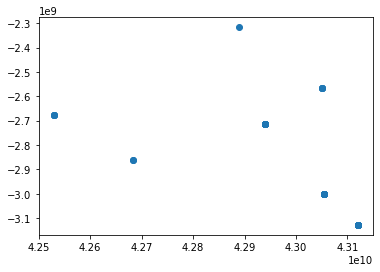

In [57]:
plt.scatter(x=df1['lon'], y=df1['lat'])
plt.show()

geometry = [Point(xy) for xy in zip(df1['lon'], df1['lat'])]
gdf = GeoDataFrame(df1, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [40]:
crs = {'init':'epsg:4326'}